In [ ]:
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np
import logging,os
import sys
sys.path.append('../')
from helper import defaultPars

FORMAT = '%(levelname)s: %(message)s at %(asctime)s'
logging.basicConfig(format=FORMAT,datefmt='%m/%d/%Y %I:%M:%S %p')
logger = logging.getLogger()

plt.rcParams.update(defaultPars)

delphesDir = os.path.abspath("../DelphesLLP")
os.environ['ROOT_INCLUDE_PATH'] = os.path.join(delphesDir,"external")

import ROOT
ROOT.gSystem.Load(os.path.join(delphesDir,"libDelphes.so"))

ROOT.gInterpreter.Declare('#include "classes/SortableObject.h"')
ROOT.gInterpreter.Declare('#include "classes/DelphesClasses.h"')
ROOT.gInterpreter.Declare('#include "external/ExRootAnalysis/ExRootTreeReader.h"')

True

In [36]:
files = {
         r'$c\tau = 3$ m' : '../pp2chi0chi0J_2_nosmear_scan/Events/run_01/ddmH_mS_500_m2_250_m1_244_dm_90_ctau_3.0_delphes_events.root',
         r'$c\tau = 27$ m' : '../pp2chi0chi0J_2_nosmear_scan/Events/run_02/ddmH_mS_500_m2_250_m1_244_dm_90_ctau_27.0_delphes_events.root',
         r'$c\tau = 108$ m' : '../pp2chi0chi0J_2_nosmear_scan/Events/run_03/ddmH_mS_500_m2_250_m1_244_dm_90_ctau_108.0_delphes_events.root',
         r'$c\tau = 432$ m' : '../pp2chi0chi0J_2_nosmear_scan/Events/run_04/ddmH_mS_500_m2_250_m1_244_dm_90_ctau_432.0_delphes_events.root'
        }

c_light = 2.99792458e8
tDecays = {}
for label,file in files.items():
    f = ROOT.TFile(file,'read')
    tree = f.Get("Delphes")
    nevts = tree.GetEntries()
    print(f"Reading {file}\n")
    nN = 0
    nNm1 = 0
    nInt = 0
    tDecays[label] = []
    nLLPs = []
    for ievt in range(nevts):
        tree.GetEntry(ievt)

        # Get parton level MET and b-bar angular separation
        llps = list(tree.llpParticles)
        nLLPs.append(len(llps))
        t_readout = -1.0
        for illp,llp in enumerate(llps):            
            for d in tree.llpDirectDaughters:
                if illp == d.M1:
                    x = np.array([d.X,d.Y,d.Z,d.T])
                    l = np.linalg.norm(x[:3])*1e-3
                    t_readout = x[-1]-l/c_light
                    t_readout = t_readout*1e9
                    break

            tDecays[label].append(t_readout)
            if t_readout < 10:
                nNm1 += 1
            elif 25 < t_readout < 35:
                nN += 1
            else:
                nInt += 1
        if len(llps) != 1:
            print(f'{len(llps)} LLPs found!')
            for llp in llps:
                print(llp.PID)
            break

    f.Close()
    print(f'{label}:')
    print(f'Number of N-1 decays = {nNm1/nevts:1.3f}')
    print(f'Number of N decays = {nN/nevts:1.5f}')
    print(f'Number of decays between N-1 and N = {nInt/nevts:1.3f}')
    print(f'Total = {(nNm1+nN+nInt)/nevts:1.3f}\n')

Reading ../pp2chi0chi0J_2_nosmear_scan/Events/run_01/ddmH_mS_500_m2_250_m1_244_dm_90_ctau_3.0_delphes_events.root

$c\tau = 3$ m:
Number of N-1 decays = 0.905
Number of N decays = 0.00594
Number of decays between N-1 and N = 0.090
Total = 1.000

Reading ../pp2chi0chi0J_2_nosmear_scan/Events/run_02/ddmH_mS_500_m2_250_m1_244_dm_90_ctau_27.0_delphes_events.root

$c\tau = 27$ m:
Number of N-1 decays = 0.286
Number of N decays = 0.10710
Number of decays between N-1 and N = 0.607
Total = 1.000

Reading ../pp2chi0chi0J_2_nosmear_scan/Events/run_03/ddmH_mS_500_m2_250_m1_244_dm_90_ctau_108.0_delphes_events.root

$c\tau = 108$ m:
Number of N-1 decays = 0.091
Number of N decays = 0.06534
Number of decays between N-1 and N = 0.844
Total = 1.000

Reading ../pp2chi0chi0J_2_nosmear_scan/Events/run_04/ddmH_mS_500_m2_250_m1_244_dm_90_ctau_432.0_delphes_events.root

$c\tau = 432$ m:
Number of N-1 decays = 0.021
Number of N decays = 0.02075
Number of decays between N-1 and N = 0.958
Total = 1.000



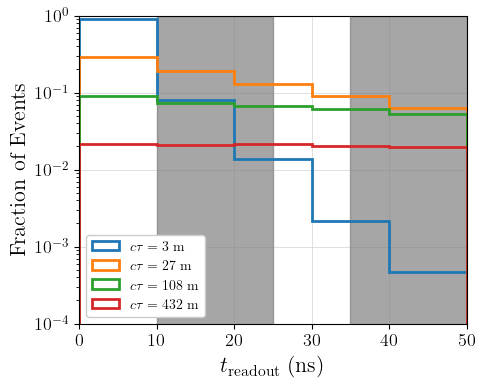

In [ ]:
for label,tDecay in tDecays.items():
    plt.hist(tDecay,bins=np.linspace(0.,50.,6),histtype='step',
             weights=[1.0/len(tDecay)]*len(tDecay),label=label,linewidth=2)
plt.yscale('log')
plt.xlabel(r'$t_{\rm readout}$ (ns)')
plt.ylabel('Fraction of Events')
# plt.vlines(x=[10.,25.,35.],ymin=1e-5,ymax=1,linestyles='dashed',colors='red')
plt.fill_betweenx(y=[1e-5,1],x1=10,x2=25,color='gray',alpha=0.7)
plt.fill_betweenx(y=[1e-5,1],x1=35,x2=50,color='gray',alpha=0.7)
plt.xlim(0.,50)
plt.ylim(1e-4,1)
plt.legend(framealpha=1.0)
plt.show()